In [0]:
%matplotlib inline

## Assignment 2

**DUE: Sunday February 16, 2020 11:59pm**

Turn in the assignment via Canvas.

To write legible answers you will need to be familiar with both [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) and [Latex](https://www.latex-tutorial.com/tutorials/amsmath/)

Before you turn this problem in, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel→→Restart) and then run all cells (in the menubar, select Cell→→Run All).

Make sure you fill in any place that says "YOUR CODE HERE" or "YOUR ANSWER HERE", as well as your name below:

In [0]:
NAME = "Sean Song"
STUDENT_ID = 1649139

## Deep Learning Model

The dataset below is the same one you created a logistic regression model for in Assignment 1, in which you found that logistic regression has the fatal flaw that it is limited to a linear decision boundary. Datasets for which the two classes are not linearly seperable can never attain 100% accuracy, as you've seen. 

Deep learning to the rescue! In this assignment you'll create a neural network to solve this classification problem, and your deep learning model will be able to attain close to 100% accuracy. Neural networks are capable of learning highly non-linear decision boundaries.

We'll construct a simple neural network to solve this problem using Keras. The final layer of the neural network will consist of a single node with a sigmoid activation function that signifies the probability of being in one class vs the other. This simple NN will outperform your logistic regression model.

Your job will then be to create your own deeper neural network that can solve this classification problem perfectly.

But first, we'll create a test set, by using the same parameters when we generated the training set, but using a different seed. Then our training and test sets will be drawn from the same distribution.


## Problem 1


### (a) 
Complete the following code segments to create a NN.

C:\Users\Sean\AppData\Local\Programs\Python\Python37\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)
data.shape = (500, 2)
labels.shape = (500,)


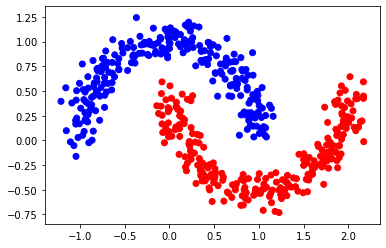

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons
from pylab import rcParams

# Create the training data
np.random.seed(42) 
data, labels = make_moons(n_samples=500, noise=0.1)
colors = ['r' if y else 'b' for y in labels]
print('data.shape =', data.shape)
print('labels.shape =', labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

test_data.shape = (500, 2)
test_labels.shape = (500,)


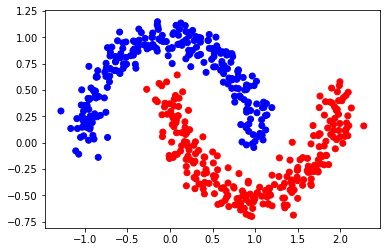

In [3]:
# Create and plot the test data
np.random.seed(17)   
test_data, test_labels = make_moons(n_samples=500, noise=0.1)
colors = ['r' if y else 'b' for y in test_labels]
print('test_data.shape =', test_data.shape)
print('test_labels.shape =', test_labels.shape)
plt.scatter(test_data[:,0], test_data[:,1], c=colors)
plt.show()

The above image is created by sampling from the same distribution as before. But these are entirely different points than your model was trained on.  So how our model performs on this test data will be a good indication of our model's ability to generalize.

In the following code, you'll create and train a simple neural network. 

In [12]:
# We'll import Keras from TensorFlow, a simple and useful way to construct neural nets.
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model


# The warnings generated can be a nuisance, so we'll turn them off.
import warnings  
warnings.filterwarnings('ignore')

#                                       #
# Construct a simple neural net model   #
#                                       #

# First define the input with correct shape of data. 2 in this case.
input_layer = Input(shape=(2,))

# The first hidden layer is a densly connected layer with 3 neurons, 
# with the relu activation function.
x1 = Dense(3, activation="relu")(input_layer)

# The second hidden layer is a densly connected layer with 2 neurons, 
# with the relu activation function.
x2 = Dense(2, activation="relu")(x1)

# The output layer is a single neuron with the sigmoid activation function.
x3 = Dense(1, activation="sigmoid")(x2)

model = Model(inputs=input_layer, outputs=x3)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [8]:
# Compile the NN model, defining the optimizer to use (sgd), the loss function (binary_crossentropy), and the metrics (acc) to use.
# These settings are appropriate for a binary classification task.

# Compile model
model.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model (obviously on the training data), iterating on the data in batches of 32 samples for 300 epochs. Have a validation_split of 0.2.
history = model.fit(data, labels, batch_size=32, epochs=300, validation_split=.2)

# Evaluate the model's performance
train_loss, train_acc = model.evaluate(data, labels)
test_loss, test_acc = model.evaluate(test_data, test_labels)

print('Training set accuracy:', train_acc)
print('Test set accuracy:', test_acc)

.2552 - acc: 0.8875 - val_loss: 0.2926 - val_acc: 0.8500
Epoch 159/300
400/400 [==============================] - 0s 99us/sample - loss: 0.2549 - acc: 0.8875 - val_loss: 0.2917 - val_acc: 0.8500
Epoch 160/300
400/400 [==============================] - 0s 84us/sample - loss: 0.2544 - acc: 0.8875 - val_loss: 0.2901 - val_acc: 0.8500
Epoch 161/300
400/400 [==============================] - 0s 102us/sample - loss: 0.2541 - acc: 0.8875 - val_loss: 0.2895 - val_acc: 0.8500
Epoch 162/300
400/400 [==============================] - 0s 102us/sample - loss: 0.2536 - acc: 0.8850 - val_loss: 0.2905 - val_acc: 0.8400
Epoch 163/300
400/400 [==============================] - 0s 101us/sample - loss: 0.2530 - acc: 0.8850 - val_loss: 0.2933 - val_acc: 0.8400
Epoch 164/300
400/400 [==============================] - 0s 119us/sample - loss: 0.2531 - acc: 0.8875 - val_loss: 0.2914 - val_acc: 0.8400
Epoch 165/300
400/400 [==============================] - 0s 97us/sample - loss: 0.2523 - acc: 0.8875 - val_loss

Note the last line of the above output - this simple model achieved a test set accuracy of 89% which is an improvement over the logistic regression model you created in Assignment 1.

Let's next look at a summary of this model, and some training plots.

In [9]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_6 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 3         
Total params: 20
Trainable params: 20
Non-trainable params: 0
_________________________________________________________________


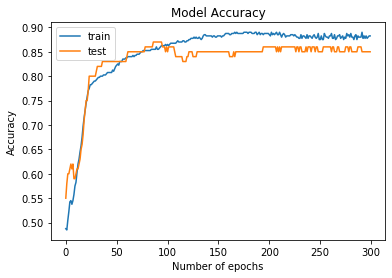

In [10]:
# The history of our accuracy during training.
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

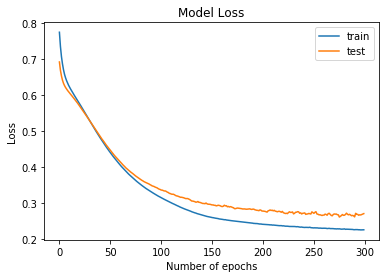

In [11]:
# The history of our cross-entropy loss during training.
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### (b) 
Explain the pattern/trend you have observed in the previous two plots in your own words.


The train data, as compared to the test data, quickly converged towards similar values, with the train accuracy oscillating about a 

### (c) 
Plot the decision boundary of the network you built (using the code below) and explain what you observe and why.

Even this very simple neural network with only 3 neurons in it's first hidden layer, 2 in it's second, and a single neuron in the output layer was able to achieve better results than we could attain with logistic regression. You'll create a better neural net model, one that attains very close to 100% accuracy on the test set. But first, the following code will allow us to visualize our deep neural network's decision boundary.

This will take a moment to construct the plot.

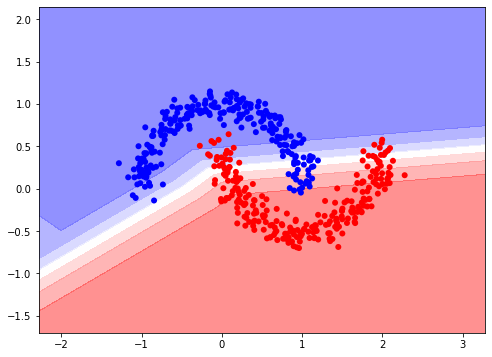

In [12]:
#
# This code is substantively from https://rohitmidha23.github.io/Neural-Network-Decision-Boundary/
#
def plot_decision_boundary(X, y, model, steps=1000, cmap='bwr'):
    # The following allows you to adjust the plot size
    rcParams['figure.figsize'] = 8, 6  # 8 inches by 6 inches
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    # Get predicted labels on training data and plot
    train_labels = model.predict(X)
    ax.scatter(X[:,0], X[:,1], c=y, cmap=cmap, lw=0)

    return fig, ax

plot_decision_boundary(test_data, test_labels, model) 
# Reset figure size back to default.
rcParams['figure.figsize'] = 6, 4

The ReLU-shaped decision boundary allows for closer approximation of the edge cases of the dataset, leading to less misclassifications

## Problem 2


The above seems to be underfitting. Our neural network was just too simple to be capable of learning to discriminate this data, though it does a bit better than logistic regression. The solution is a larger and deeper neural network.

### (a) 
Create a neural network with more nodes per layer, and more layers, that attains as close to 100% accuracy as possible on the test set. Don't be afraid to experiment with much larger networks with more nodes per layer and more layers.

In [49]:
input_layer_2 = Input(shape=(2,))

x1_2 = Dense(108, activation="relu")(input_layer_2)

x2_2 = Dense(108, activation="relu")(x1_2)

x3_2 = Dense(108, activation="relu")(x2_2)

x4_2 = Dense(1, activation="sigmoid")(x3_2)

model_2 = Model(inputs=input_layer_2, outputs=x4_2)

### (b) ###
Compile and train the NN model, defining the optimizer to use, the loss function, 
and the metrics to use. 

In [50]:
model_2.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

history_2 = model_2.fit(data, labels, batch_size=32, epochs=300, validation_split=.2)

# Evaluate the model's performance
train_loss_2, train_acc_2 = model_2.evaluate(data, labels)
test_loss_2, test_acc_2 = model_2.evaluate(test_data, test_labels)

print('Training set accuracy:', train_acc_2)
print('Test set accuracy:', test_acc_2)

=========] - 0s 193us/sample - loss: 0.1453 - acc: 0.9500 - val_loss: 0.1884 - val_acc: 0.9100
Epoch 160/300
400/400 [==============================] - 0s 166us/sample - loss: 0.1445 - acc: 0.9475 - val_loss: 0.1789 - val_acc: 0.9100
Epoch 161/300
400/400 [==============================] - 0s 146us/sample - loss: 0.1432 - acc: 0.9475 - val_loss: 0.1741 - val_acc: 0.9100
Epoch 162/300
400/400 [==============================] - 0s 172us/sample - loss: 0.1428 - acc: 0.9500 - val_loss: 0.1734 - val_acc: 0.9100
Epoch 163/300
400/400 [==============================] - 0s 146us/sample - loss: 0.1411 - acc: 0.9500 - val_loss: 0.1704 - val_acc: 0.9100
Epoch 164/300
400/400 [==============================] - 0s 152us/sample - loss: 0.1403 - acc: 0.9500 - val_loss: 0.1775 - val_acc: 0.9200
Epoch 165/300
400/400 [==============================] - 0s 166us/sample - loss: 0.1394 - acc: 0.9500 - val_loss: 0.1753 - val_acc: 0.9200
Epoch 166/300
400/400 [==============================] - 0s 160us/sampl

### (c)
What was your final test set accuracy?

Final accuracy was .998 for training data, .992 for test data


### (d) ###
Create a summary of your model.

In [52]:
model_2.summary()


Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 2)]               0         
_________________________________________________________________
dense_76 (Dense)             (None, 108)               324       
_________________________________________________________________
dense_77 (Dense)             (None, 108)               11772     
_________________________________________________________________
dense_78 (Dense)             (None, 108)               11772     
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 109       
Total params: 23,977
Trainable params: 23,977
Non-trainable params: 0
_________________________________________________________________


### (e) ###
How many parameters does your model have?

23977


### (f) ###
Plot the learning curves for your model, one for accuracy and the other for cross-entropy loss.

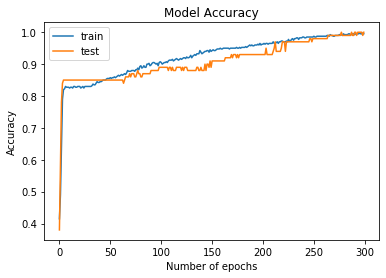

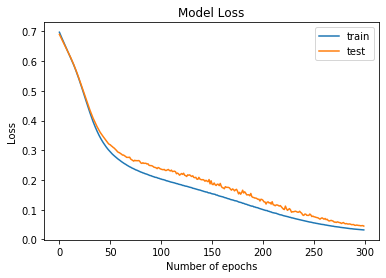

In [51]:
plt.plot(history_2.history['acc'])
plt.plot(history_2.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

### (g) ###
Plot your model's decision boundary.

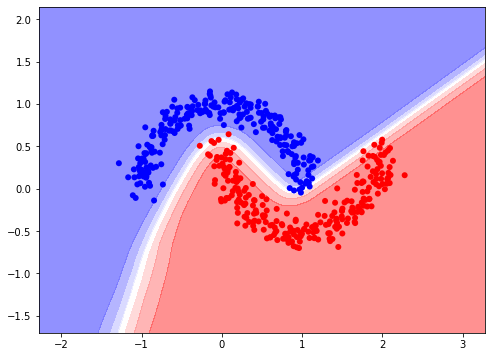

In [53]:
plot_decision_boundary(test_data, test_labels, model_2) 
rcParams['figure.figsize'] = 6, 4

## Noisier Data

Next you'll retrain your neural network on the following noisier data. This time not even a neural network model won't be able to attain 100% accuracy.

data.shape = (500, 2)
labels.shape = (500,)


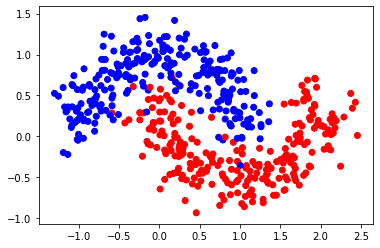

In [54]:
# Create the training data
np.random.seed(137) 
data, labels = make_moons(n_samples=500, noise=0.2)
colors = ['r' if y else 'b' for y in labels]
print('data.shape =', data.shape)
print('labels.shape =', labels.shape)
plt.scatter(data[:,0], data[:,1], c=colors)
plt.show()

test_data.shape = (500, 2)
test_labels.shape = (500,)


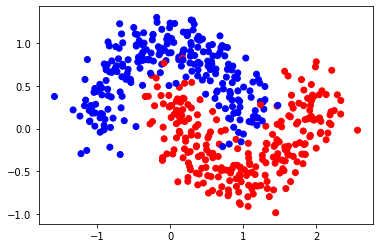

In [55]:
# Create the test data
np.random.seed(17)   
test_data, test_labels = make_moons(n_samples=500, noise=0.2)
colors = ['r' if y else 'b' for y in test_labels]
print('test_data.shape =', test_data.shape)
print('test_labels.shape =', test_labels.shape)
plt.scatter(test_data[:,0], test_data[:,1], c=colors)
plt.show()

## Problem 3

### (a)
Your model is already defined, so copy your code from 2(b) above and retrain your model on this new, noiser data.

In [56]:
model_2.compile(optimizer="sgd", loss="binary_crossentropy", metrics=["accuracy"])

history_3 = model_2.fit(data, labels, batch_size=32, epochs=300, validation_split=.2)

# Evaluate the model's performance
train_loss_3, train_acc_3 = model_2.evaluate(data, labels)
test_loss_3, test_acc_3 = model_2.evaluate(test_data, test_labels)

print('Training set accuracy:', train_acc_3)
print('Test set accuracy:', test_acc_3)

- val_loss: 0.0391 - val_acc: 0.9900
Epoch 159/300
400/400 [==============================] - 0s 127us/sample - loss: 0.0827 - acc: 0.9675 - val_loss: 0.0384 - val_acc: 0.9900
Epoch 160/300
400/400 [==============================] - 0s 125us/sample - loss: 0.0813 - acc: 0.9725 - val_loss: 0.0388 - val_acc: 0.9900
Epoch 161/300
400/400 [==============================] - 0s 140us/sample - loss: 0.0819 - acc: 0.9650 - val_loss: 0.0395 - val_acc: 0.9900
Epoch 162/300
400/400 [==============================] - 0s 137us/sample - loss: 0.0820 - acc: 0.9700 - val_loss: 0.0386 - val_acc: 0.9900
Epoch 163/300
400/400 [==============================] - 0s 148us/sample - loss: 0.0826 - acc: 0.9625 - val_loss: 0.0394 - val_acc: 0.9900
Epoch 164/300
400/400 [==============================] - 0s 162us/sample - loss: 0.0820 - acc: 0.9700 - val_loss: 0.0391 - val_acc: 0.9900
Epoch 165/300
400/400 [==============================] - 0s 159us/sample - loss: 0.0810 - acc: 0.9725 - val_loss: 0.0380 - val_ac

### (b)

Plot your models training curves for accuracy and loss, as well as your model's decision boundary.

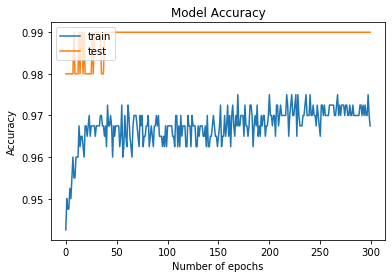

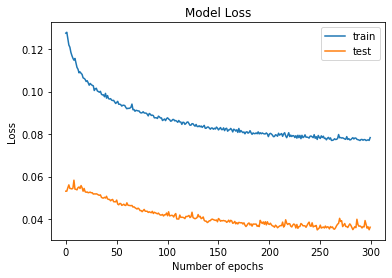

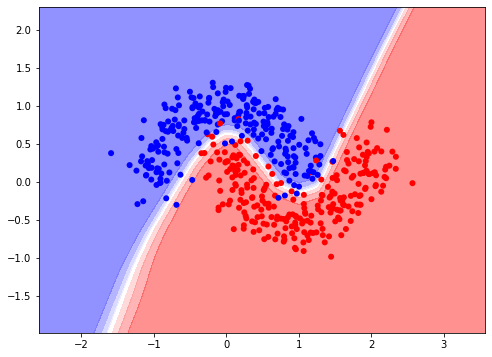

In [59]:
plt.plot(history_3.history['acc'])
plt.plot(history_3.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Number of epochs')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

plot_decision_boundary(test_data, test_labels, model_2) 
rcParams['figure.figsize'] = 6, 4

### (c)
Does your model show signs of overfitting?  Please explain why you think so (one way or the other).

Yes, the model reached high accuracy early on so the rest of the training time was spent simply conforming to the training data to reduce loss

### (d)
Does your model's training loss plot indicate that further training may yield a slightly better accuracy?

No, the model achieve peak accuracy early on and did not improve



## Convolutional Neural Network [CNN] for Cat vs. Dog Image Classification



In this exercise, you'll build a classifier model from scratch that is able to distinguish dogs from cats. We will follow these steps:

1. Explore the example data
2. Build a small convnet from scratch to solve our classification problem
3. Evaluate training and validation accuracy

### Explore the Example Data
Let's start by downloading our example data, a .zip of 3,000 JPG pictures of cats and dogs, and extracting it locally in `/tmp`.


**NOTE:** The 3,000 images used in this exercise are excerpted from the ["Dogs vs. Cats" dataset](https://www.kaggle.com/c/dogs-vs-cats/data) available on Kaggle, which contains 25,000 images. Here, we use a subset of the full dataset to decrease training time for educational purposes.

In [68]:
# !wget --no-check-certificate \
#     https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
#     -O /tmp/cats_and_dogs_filtered.zip
from urllib.request import urlretrieve
!mkdir tmp
urlretrieve("https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip", "tmp/cats_and_dogs_filtered.zip")

A subdirectory or file tmp already exists.


('tmp/cats_and_dogs_filtered.zip', <http.client.HTTPMessage at 0x224d304e1c8>)

In [5]:
import os
import zipfile

local_zip = 'tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('tmp')
zip_ref.close()

The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets, which in turn each contain `cats` and `dogs` subdirectories. Let's define each of these directories:

In [13]:
import os

base_dir = 'tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

Now, let's see what the filenames look like in the `cats` and `dogs` `train` directories (file naming conventions are the same in the `validation` directory):

In [7]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10]) 

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


Let's find out the total number of cat and dog images in the `train` and `validation` directories:

In [8]:
print('total training cat images:', len(os.listdir(train_cats_dir))) 
print('total training dog images:', len(os.listdir(train_dogs_dir))) 
print('total validation cat images:', len(os.listdir(validation_cats_dir))) 
print('total validation dog images:', len(os.listdir(validation_dogs_dir))) 

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500


For both cats and dogs, we have 1,000 training images and 500 test images.

Now let's take a look at a few pictures to get a better sense of what the cat and dog datasets look like. First, configure the matplot parameters:

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

Now, display a batch of 8 cat and 8 dog pictures. You can rerun the cell to see a fresh batch each time:

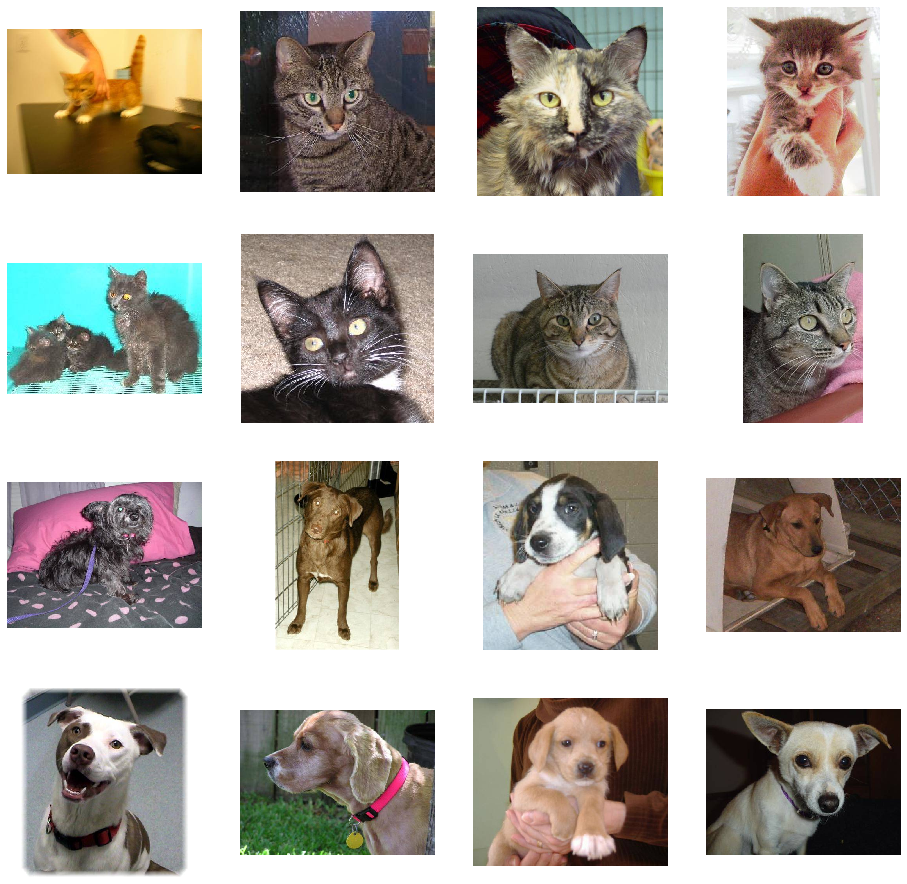

In [10]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Problem 4



We are building a small Convnet from scratch to get to 72% accuracy. The images that will go into our convnet are 150x150 color images (in the next section on Data Preprocessing, we'll add handling to resize all the images to 150x150 before feeding them into the neural network).

Let's code up the architecture. We will stack 3 {convolution + relu + maxpooling} modules. Our convolutions operate on 3x3 windows and our maxpooling layers operate on 2x2 windows. Our first convolution extracts 4 filters, the following one extracts 5 filters, and the last one extracts 10 filters.

For help on using the convolution layers see documentation: https://keras.io/layers/convolutional/

Hint: Below we import all the layers you'll need.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_moons
from pylab import rcParams
# Load some neural network functions we'll be using.
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Input
from tensorflow.keras.models import Model

In [6]:
# Our input feature map is 150x150x3: 150x150 for the image pixels, and 3 for
# the three color channels: R, G, and B
img_input = Input(shape=(150, 150, 3))

# First convolution extracts 4 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

c1 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=4, kernel_size=(3,3))(img_input))

# Second convolution extracts 5 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

c2 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=5, kernel_size=(3,3))(c1))

# Third convolution extracts 10 filters that are 3x3
# Convolution is followed by max-pooling layer with a 2x2 window

c3 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=10, kernel_size=(3,3))(c2))

Tensor("max_pooling2d_2/MaxPool:0", shape=(?, 74, 74, 4), dtype=float32)


On top of it we stick two fully-connected layers. Because we are facing a two-class classification problem, i.e. a binary classification problem, we will end our network with a sigmoid activation, so that the output of our network will be a single scalar between 0 and 1, encoding the probability that the current image is class 1 (as opposed to class 0).

In [9]:
# Flatten feature map to a 1-dim tensor so we can add fully connected layers

f_4 = Flatten()(c3)
# flatten

# Create a fully connected (dense) layer with ReLU activation and 20 hidden units

x1_4 = Dense(20, activation="relu")(f_4)


# Create output layer with a single node and sigmoid activation

x2_4 = Dense(1, activation="sigmoid")(x1_4)

# Create model:
# input = input feature map
# output = input feature map + stacked convolution/maxpooling layers + fully 
# connected layer + sigmoid output layer
model_4 = Model(img_input, x2_4)

Let's summarize the model architecture:

In [10]:
model_4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 148, 148, 4)       112       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 74, 74, 4)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 72, 72, 5)         185       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 36, 36, 5)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 34, 34, 10)        460       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 17, 17, 10)        0     

The "output shape" column shows how the size of your feature map evolves in each successive layer. The convolution layers reduce the size of the feature maps by a bit due to padding, and each pooling layer halves the feature map.

Next, we'll configure the specifications for model training. We will train our model with the `binary_crossentropy` loss, because it's a binary classification problem and our final activation is a sigmoid. We will use the `rmsprop` optimizer with a learning rate of `0.001`. During training, we will want to monitor classification accuracy.

**NOTE**: In this case, using the [RMSprop optimization algorithm](https://wikipedia.org/wiki/Stochastic_gradient_descent#RMSProp) is preferable to [stochastic gradient descent](https://developers.google.com/machine-learning/glossary/#SGD) (SGD), because RMSprop automates learning-rate tuning for us. (Other optimizers, such as [Adam](https://wikipedia.org/wiki/Stochastic_gradient_descent#Adam) and [Adagrad](https://developers.google.com/machine-learning/glossary/#AdaGrad), also automatically adapt the learning rate during training, and would work equally well here.)

In [11]:
from tensorflow.keras.optimizers import RMSprop

model_4.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Let's set up data generators that will read pictures in our source folders, convert them to `float32` tensors, and feed them (with their labels) to our network. We'll have one generator for the training images and one for the validation images. Our generators will yield batches of 20 images of size 150x150 and their labels (binary).

As you may already know, data that goes into neural networks should usually be normalized in some way to make it more amenable to processing by the network. (It is uncommon to feed raw pixels into a convnet.) In our case, we will preprocess our images by normalizing the pixel values to be in the `[0, 1]` range (originally all values are in the `[0, 255]` range).

In Keras this can be done via the `keras.preprocessing.image.ImageDataGenerator` class using the `rescale` parameter. This `ImageDataGenerator` class allows you to instantiate generators of augmented image batches (and their labels) via `.flow(data, labels)` or `.flow_from_directory(directory)`. These generators can then be used with the Keras model methods that accept data generators as inputs: `fit_generator`, `evaluate_generator`, and `predict_generator`.

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size = (150, 150),  # All images will be resized to 150x150
        batch_size = 20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode = 'binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size = (150, 150),
        batch_size = 20,
        class_mode = 'binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


##### Training
Let's train on all 2,000 images available, for 15 epochs, and validate on all 1,000 test images. (This may take a few minutes to run.)

In [15]:
history_4 = model_4.fit_generator(
      train_generator,
      steps_per_epoch = 100,  # 2000 images = batch_size * steps
      epochs = 15,
      validation_data = validation_generator,
      validation_steps = 50,  # 1000 images = batch_size * steps
      verbose = 2)

Epoch 1/15
Epoch 1/15
100/100 - 20s - loss: 0.6946 - acc: 0.5220 - val_loss: 0.7055 - val_acc: 0.5090
Epoch 2/15
Epoch 1/15
100/100 - 15s - loss: 0.6470 - acc: 0.6335 - val_loss: 0.6431 - val_acc: 0.6260
Epoch 3/15
Epoch 1/15
100/100 - 15s - loss: 0.5910 - acc: 0.6805 - val_loss: 0.6257 - val_acc: 0.6570
Epoch 4/15
Epoch 1/15
100/100 - 15s - loss: 0.5305 - acc: 0.7395 - val_loss: 0.6258 - val_acc: 0.6630
Epoch 5/15
Epoch 1/15
100/100 - 15s - loss: 0.4566 - acc: 0.7860 - val_loss: 0.6481 - val_acc: 0.6500
Epoch 6/15
Epoch 1/15
100/100 - 15s - loss: 0.3706 - acc: 0.8475 - val_loss: 0.6844 - val_acc: 0.6610
Epoch 7/15
Epoch 1/15
100/100 - 15s - loss: 0.2978 - acc: 0.8865 - val_loss: 0.7267 - val_acc: 0.6510
Epoch 8/15
Epoch 1/15
100/100 - 16s - loss: 0.2206 - acc: 0.9255 - val_loss: 0.8062 - val_acc: 0.6460
Epoch 9/15
Epoch 1/15
100/100 - 16s - loss: 0.1613 - acc: 0.9440 - val_loss: 0.9337 - val_acc: 0.6290
Epoch 10/15
Epoch 1/15
100/100 - 17s - loss: 0.1129 - acc: 0.9660 - val_loss: 1.00

Evaluating Accuracy and Loss for the Model
Our simple CNN achieved about 70% accuracy on the validation set. Let's plot the training/validation accuracy and loss as collected during training:

Text(0.5, 1.0, 'Training and validation loss')

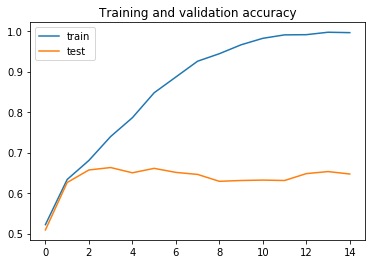

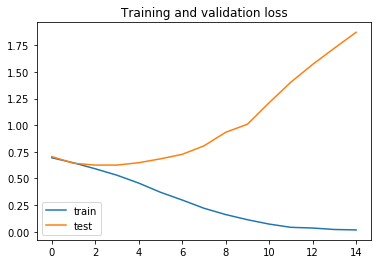

In [17]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc_4 = history_4.history['acc']
val_acc_4 = history_4.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss_4 = history_4.history['loss']
val_loss_4 = history_4.history['val_loss']

# Get number of epochs
epochs_4 = range(len(acc_4))

# Plot training and validation accuracy per epoch
plt.plot(epochs_4, acc_4)
plt.plot(epochs_4, val_acc_4)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs_4, loss_4)
plt.plot(epochs_4, val_loss_4)
plt.legend(['train', 'test'], loc='lower left')
plt.title('Training and validation loss')

This neural net has a serious overfitting problem!

## Problem 5


### (a)
Create a neural network very similar to the one above, but with 

    16 channels in the first convolutional layer
    32 channels in the second convolutional layer
    64 channels in the third convolutional layer
    512 channels in the dense layer immediately following the flattened layer.
   
**NOTE**: This is a configuration that is widely used and known to work well for image classification. Also, since we have relatively few training examples (1,000), using just three convolutional modules keeps the model small, which lowers the risk of overfitting.

In [22]:
img_input_5 = Input(shape=(150, 150, 3))
c1_5 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=16, kernel_size=(3,3))(img_input_5))
c2_5 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=32, kernel_size=(3,3))(c1_5))
c3_5 = MaxPooling2D(pool_size=(2,2))(Conv2D(filters=64, kernel_size=(3,3))(c2_5))
f_5 = Flatten()(c3_5)
x1_5 = Dense(512, activation="relu")(f_5)
x2_5 = Dense(1, activation="sigmoid")(x1_5)
model_5 = Model(img_input_5, x2_5)


### (b)

Compile your model, as before.

In [26]:
model_5.compile(loss = 'binary_crossentropy',
              optimizer = RMSprop(lr = 0.001),
              metrics = ['acc'])

### (c)

Make a summary of this model. How many trainable parameters does this model have?

In [27]:
model_5.summary()


Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 17, 17, 64)        0   

This model has 9494561 trainable parameters.

### (d) 

Now train your model, as before again for 15 epochs.

In [28]:
history_5 = model_5.fit_generator(
      train_generator,
      steps_per_epoch = 100,  # 2000 images = batch_size * steps
      epochs = 15,
      validation_data = validation_generator,
      validation_steps = 50,  # 1000 images = batch_size * steps
      verbose = 2)

Epoch 1/15
Epoch 1/15
100/100 - 48s - loss: 1.6928 - acc: 0.5445 - val_loss: 0.6419 - val_acc: 0.5880
Epoch 2/15
Epoch 1/15
100/100 - 38s - loss: 0.7511 - acc: 0.6010 - val_loss: 0.6564 - val_acc: 0.5570
Epoch 3/15
Epoch 1/15
100/100 - 39s - loss: 0.6418 - acc: 0.6630 - val_loss: 0.5992 - val_acc: 0.6750
Epoch 4/15
Epoch 1/15
100/100 - 34s - loss: 0.5925 - acc: 0.6950 - val_loss: 0.5661 - val_acc: 0.6950
Epoch 5/15
Epoch 1/15
100/100 - 38s - loss: 0.5017 - acc: 0.7480 - val_loss: 0.5771 - val_acc: 0.7250
Epoch 6/15
Epoch 1/15
100/100 - 44s - loss: 0.4321 - acc: 0.8165 - val_loss: 0.6462 - val_acc: 0.6830
Epoch 7/15
Epoch 1/15
100/100 - 46s - loss: 0.2983 - acc: 0.8805 - val_loss: 0.6135 - val_acc: 0.7180
Epoch 8/15
Epoch 1/15
100/100 - 48s - loss: 0.1679 - acc: 0.9360 - val_loss: 0.9022 - val_acc: 0.6950
Epoch 9/15
Epoch 1/15
100/100 - 47s - loss: 0.0914 - acc: 0.9690 - val_loss: 0.9178 - val_acc: 0.7140
Epoch 10/15
Epoch 1/15
100/100 - 48s - loss: 0.0622 - acc: 0.9870 - val_loss: 1.04

### (e)
What is the last epoch training and validation accuracies (round off your answers to the nearest hundredth)?

training accuracy = _____,  validation accuracy = _____

### (f)
Plot the learning curves for accuracy and loss for your CNN training.

Text(0.5, 1.0, 'Training and validation loss')

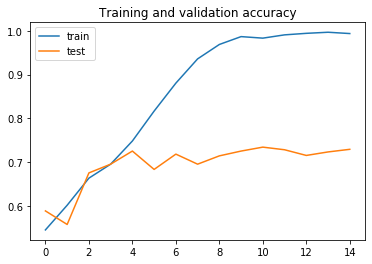

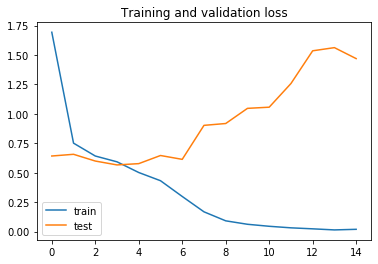

In [39]:
# Retrieve a list of accuracy results on training and test data
# sets for each training epoch
acc_5 = history_5.history['acc']
val_acc_5 = history_5.history['val_acc']

# Retrieve a list of list results on training and test data
# sets for each training epoch
loss_5 = history_5.history['loss']
val_loss_5 = history_5.history['val_loss']

# Get number of epochs
epochs_5 = range(len(acc_5))

# Plot training and validation accuracy per epoch
plt.plot(epochs_5, acc_5)
plt.plot(epochs_5, val_acc_5)
plt.legend(['train', 'test'], loc='upper left')
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs_5, loss_5)
plt.plot(epochs_5, val_loss_5)
plt.legend(['train', 'test'], loc='lower left')
plt.title('Training and validation loss')

### (g)
Do these plots show signs of overfitting?   Why, or why not?

[YOUR ANSWER HERE]

## Problem 6

below is a neural network with two hidden layers and one output layer. each hidden node $h_{ij}$ has a sigmoid activation function. The output node $o_1$ has a linear activation function ($out(x,y)=3x+2y$)

![bn1](https://people.ucsc.edu/~mbriden/cse140/as2nn.jpg)

Given the batch of data

| | $x_{0}$ | $x_{1}$ | $x_{2}$ | $y$ |
| --- | --- | --- | --- | --- |
|$obs_{1}$ | 1 | 7 | 3 | 12 |
|$obs_{2}$ | 1 | 5 | 1 | 10 |
|$obs_{3}$ | 1 | 1 | 1 | 25 |

Calculate the following:

### (a) 
Calculate the predicted value, $out$, for $obs_1$, $obs_2$, and $obs_3$.

$obs_1$

| i | $h_{1}$ | $h_{2}$ | out |
| --- | --- | --- | --- |
| 1 | $\sigma$(.1+.49-.3) = 0.991 | $\sigma$(.991\*.7+.119\*.9-.007\*1) = 0.689 |  |
| 7 | $\sigma$(.3-.25+.4) = 0.119 |  | 3\*.689+2\*.572 = 3.209 |
| 3 | $\sigma$(.9-.7-.3)  = 0.007 | $\sigma$(.991\*.3-.119\*.1+.007\*.4) = 0.572 |  |

$obs_2$

| i | $h_{1}$ | $h_{2}$ | out |
| --- | --- | --- | --- |
| 1 | $\sigma$(.1+.49-.3) = 0.971 | $\sigma$(.971\*.7+.142\*.9-.052\*1) = 0.680 |  |
| 7 | $\sigma$(.3-.25+.4) = 0.142 |  | 3\*.680+2\*.574 = 3.188 |
| 3 | $\sigma$(.9-.7-.3)  = 0.052 | $\sigma$(.971\*.3-.142\*.1+.052\*.4) = 0.574 |  |

$obs_3$

| i | $h_{1}$ | $h_{2}$ | out |
| --- | --- | --- | --- |
| 1 | $\sigma$(.1+.49-.3) = 0.668 | $\sigma$(.668\*.7+.550\*.9-.475\*1) = 0.620 |  |
| 7 | $\sigma$(.3-.25+.4) = 0.550 |  | 3\*.620+2\*.583 = 3.025 |
| 3 | $\sigma$(.9-.7-.3)  = 0.475 | $\sigma$(.668\*.3-.550\*.1+.475\*.4) = 0.583 |  |

In [8]:
from math import e

def sigmoid(x):
    return 1 / (1 + e ** -x)
def dot(a,b):
    return a[0]*b[0]+a[1]*b[1]+a[2]*b[2]
def calc(input):
    a = sigmoid(dot((.1,.7,-.1), input))
    print(a)
    b = sigmoid(dot((.3,-.5,.4),input))
    print(b)
    c = sigmoid(dot((.9,-.7,-.3),input))
    print(c)

    d = sigmoid(dot((.7,.9,-1),(a,b,c)))
    print(d)
    e = sigmoid(dot((.3,-.1,.4),(a,b,c)))
    print(e)
    print(3*d+2*e)
calc((1,7,3))
print()
calc((1,5,1))
print()
calc((1,1,1))


0.990986701347152
0.11920292202211757
0.0073915413442819785
0.6885998901933904
0.5715878119339002
3.2089752944479715

0.9706877692486436
0.14185106490048777
0.052153563078417745
0.6802658555269303
0.5739248314824401
3.188647229545671

0.668187772168166
0.549833997312478
0.47502081252106
0.6195317513659335
0.5830924503405644
3.0247801547789295


### (b) 
Calculate the squared loss for $obs_1$, $obs_2$, $obs_3$.

| $obs_1$ | $obs_2$ | $obs_3$ |
| --- | --- | --- |
| $(12-3.209)^2$ = 77.281 | $(10-3.188)^2$ = 46.403 | $(25-3.025)^2$ = 482.901 |

### (c) 
Calculate the mean squared error for this batch.

$$\frac{77.281+46.403+482.901}{3} = 202.195 $$

## Problem 7

We are building a small CNN that *only* has two convolution layers. it takes in images of size $4\times4\times1$. The kernels for the convolution layers are named Kernel 1 (of size $2\times2\times1$) and Kernel 2 (of size $2\times2\times1$) each with stride 1 (both in the horizontal and vertical directions) and contain the numbers shown above. Volume 1 is currently being fed into the network. Volume 1 and Volume 2 are not padded before being convolved with Kernel 1 and Kernel 2 respectively. 

![bn1](https://people.ucsc.edu/~mbriden/cse140/as2conv.jpg)


Calculate the following:

### (a) 
Values for Volume 2.

| -1 |  2 |  2 |
| :---: | :---: | :---: |
|  1 |  -1 |  5 |
|  -1 |  -2 |  1 |

### (b) 
Values for Volume 3.

| 2 |  15 |
| :---: | :---: | 
|  7 |  14 |

### (c) 
what is the value returned by passing Volume 3 into an AveragePool(2,2,1) layer?

5.5